In [39]:
#import all library and set plots we want to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [40]:
df = pd.read_csv('vgsales.csv')

In [41]:
#show first 5 rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
#show last 5 rows
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
#print a concise summary of a Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [43]:
#calculating some statistical data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
#show number of rows and colomns
df.shape

(16598, 11)

In [8]:
# check on columns 
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Data Cleaning



In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [44]:
updated_df = df.dropna(axis=0)

In [45]:
updated_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [46]:
updated_df = df.copy()

In [47]:
#To find duplicates 
sum(df.duplicated())

0

In [48]:
# let's see the average Global_Sales by platforms
updated_df.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:].values

array([0.82767857, 0.83702929, 1.05037037, 2.56193878, 2.60663265])

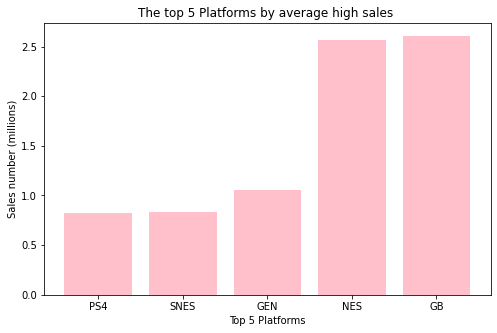

In [49]:
#Visualization
plt.figure(figsize=(8,5))
plt.bar([1,2,3,4,5], [0.82767857, 0.83702929,1.05037037,2.56193878 ,2.60663265 ], tick_label=['PS4', 'SNES', 'GEN', 'NES', 'GB']
        ,color='pink')
plt.title('The top 5 Platforms by average high sales ')
plt.xlabel('Top 5 Platforms')
plt.ylabel('Sales number (millions)');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


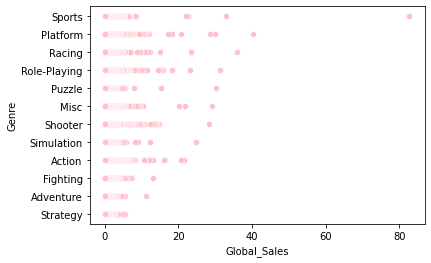

In [92]:
sb.scatterplot(updated_df['Global_Sales'],updated_df['Genre'], color='pink')

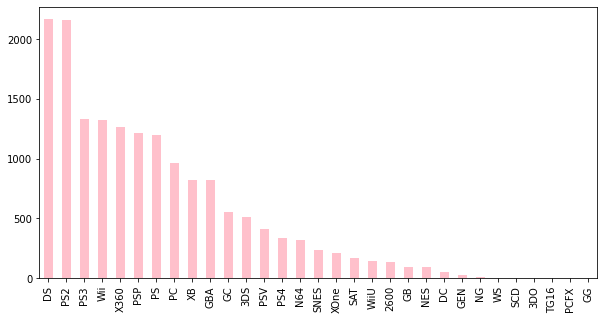

In [55]:
plt.figure(figsize=(10,5))
updated_df['Platform'].value_counts().plot(kind='bar', color='pink');

In [58]:
updated_df[["Genre","Global_Sales"]].groupby("Genre").sum()


,Global_Sales
Genre,
Action,1751.18
Adventure,239.04
Fighting,448.91
Misc,809.96
Platform,831.37
Puzzle,244.95
Racing,732.04
Role-Playing,927.37
Shooter,1037.37


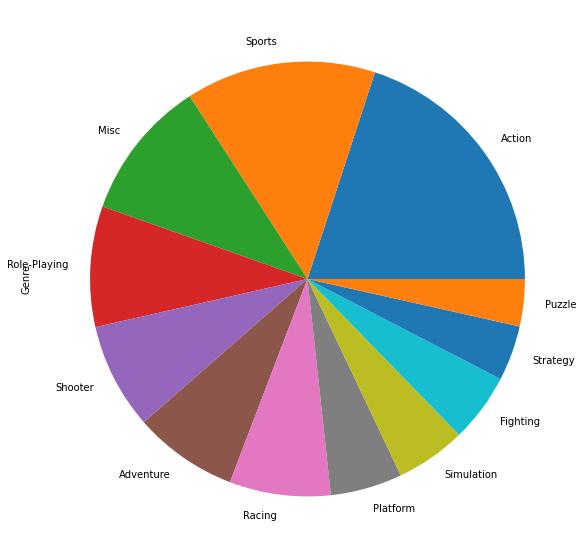

In [85]:
updated_df['Genre'].value_counts().plot(kind='pie', figsize=(10,10))

<function matplotlib.pyplot.show>

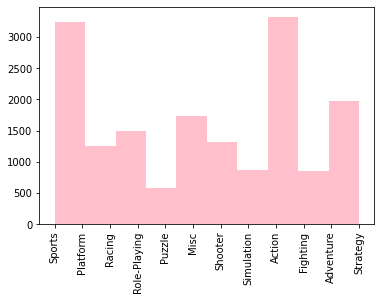

In [61]:
plt.hist(updated_df['Genre'], color='pink')
plt.xticks(rotation=90)
plt.show

In [62]:
df[['Name', 'Genre', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

,Name,Genre,Global_Sales
0,Wii Sports,Sports,82.74
1,Super Mario Bros.,Platform,40.24
2,Mario Kart Wii,Racing,35.82
3,Wii Sports Resort,Sports,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,31.37
5,Tetris,Puzzle,30.26
6,New Super Mario Bros.,Platform,30.01
7,Wii Play,Misc,29.02
8,New Super Mario Bros. Wii,Platform,28.62
9,Duck Hunt,Shooter,28.31


In [63]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


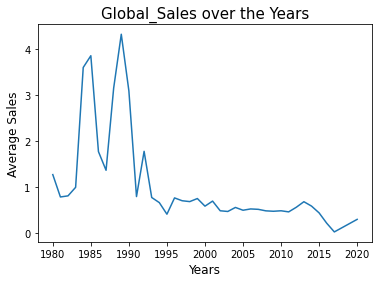

In [91]:
rev = df.groupby('Year')['Global_Sales'].mean()
plt.plot(rev)
plt.title('Global_Sales over the Years', size=15);
plt.xlabel('Years', size=12)
plt.ylabel('Average Sales', size=12);